# 규제 선형 모델 (Regularized Linear Regression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Ridge 회귀
- L2 규제를 적용한 회귀 모델
- 회귀 계수들의 제곱합에 alpha 패널티를 곱해 비용 산정에 반영
- alpha 값이 커지면 회귀 계수가 작아짐 -> overfitting 방지 (alpha는 식에서 람다)

In [2]:
from sklearn.model_selection import train_test_split

boston_df = pd.read_csv('./data/boston_housing_train.csv')

X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

X_train, X_test, y_train, y_test = \
train_test_split(X,y, random_state=42)

In [14]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=50) # alpha 커지먄 규제 강해짐 => 너무 크면 underfitting
reg.fit(X_train, y_train)
print(f"Train Accracy: {reg.score(X_train, y_train)}, Test Accuracy: {reg.score(X_test, y_test)} \n")

print(reg.coef_)

Train Accracy: 0.7308221927625931, Test Accuracy: 0.6760635100254703 

[-0.12375898  0.03722569 -0.02769387  0.88325116 -0.35435267  3.06152528
 -0.00993736 -1.13911744  0.27392412 -0.01330369 -0.79775713  0.01331557
 -0.65063974]


In [16]:
# 다른 평가 지표
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression(y_true, y_pred):
    
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}")

**파이프라인 사용**

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# 전처리 단계 & 모델 만드는 단계 묶어서 하나의 객체로 가능하게 함
model = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False, degree=2)), # 0번쨰 인자는 이름
    ('reg', Ridge(alpha=10))
])

model.fit(X_train,y_train)
print(model.score(X_train, y_train), model.score(X_test, y_test))
evaluate_regression(y_test, model.predict(X_test))

0.934045449915728 0.7735821268700346
MSE: 15.855396927570286, RMSE: 3.981883590409228, MAE: 2.490640641202681, R2: 0.7735821268700346


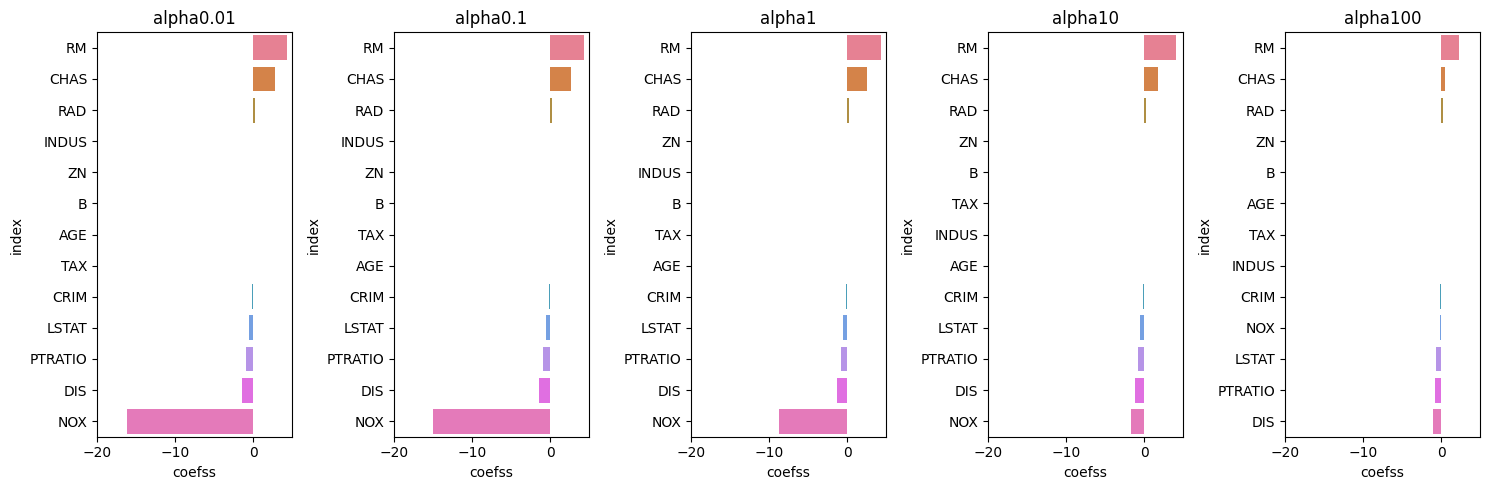

In [24]:
# alpha값에 따른 시각화 (가중치)
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,5))

alphas = [0.01, 0.1, 1, 10, 100]

for i, alpha in enumerate(alphas):
   
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    coef = model.coef_
    coef_ser = pd.Series(coef, index=X.columns)
    coef_ser.name = 'alpha' + str(alpha)
    coef_ser = coef_ser.sort_values(ascending=False)
    
    ax[i].set_title(coef_ser.name)
    ax[i].set_xlabel('coefss')
    ax[i].set_xlim(-20,5)
    ax[i].set_ylabel('index')
    sns.barplot(x=coef_ser.values, y=coef_ser.index, ax=ax[i], hue=coef_ser.index)
    
plt.tight_layout()
plt.show()
# 밑에서 알파값이 커질 수록 특히 'NOX'에 해당하는 weight가 작아지는 것을 볼 수 있음

## Lasso 회귀
- L1 규제를 적용한 선형 회귀 모델
- 회귀계수 절댓값의 합을 alpha 값과 곱해 규제 정도 지정
- alpha 값이 커지면 규제 정도가 커짐 (L2 규제랑 같음)
- 회귀계수를 0까지 줄일 수 있음 = 해당 특성 아예 반영 X = 특성 선택 효과 있음

In [38]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=10)

reg.fit(X_train, y_train)
print(reg.score(X_train, y_train), reg.score(X_test, y_test))
print(reg.coef_)
print(reg.feature_names_in_)

0.5373948270602298 0.49459972513091244
[-0.          0.00806625 -0.          0.          0.          0.
  0.         -0.          0.         -0.00896833 -0.          0.01014021
 -0.62986968]
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## ElasticNet 회귀
- L1, L2 규제를 함께 적용할 수 있는 회귀 모델

**Hyperparameter**
- alpha: 규제 정도 (L1 + L2)
- l1_ratio: alpha 값 중 L1 규제의 비율 (default: 0.5)

In [61]:
from sklearn.linear_model import ElasticNet

el = ElasticNet(alpha=1000, l1_ratio=0.6)

el.fit(X_train, y_train)
print(el.score(X_train, y_train), el.score(X_test, y_test))
print(el.coef_)

0.05658860721499692 0.04730308042102804
[-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.00383508 -0.          0.
 -0.        ]


In [67]:
# Pipeline 사용 -> degree 3 feature engineering (poly) -> ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

model = Pipeline([
     ('poly', PolynomialFeatures(include_bias=False, degree=3)),
     ('el', ElasticNet(alpha=10, l1_ratio=0.2))
 ])

model.fit(X_train, y_train)
print(model.score(X_train, y_train), model.score(X_test, y_test))
evaluate_regression(y_test, model.predict(X_test))

0.9611341184335465 0.7366191023425084
MSE: 18.4438119560563, RMSE: 4.294625939014515, MAE: 2.560502096667109, R2: 0.7366191023425084


c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.424e+02, tolerance: 3.361e+00
  model = cd_fast.enet_coordinate_descent(


In [68]:
model.named_steps

{'poly': PolynomialFeatures(degree=3, include_bias=False),
 'el': ElasticNet(alpha=10, l1_ratio=0.2)}

In [71]:
reg = model.named_steps['el']
print(reg.coef_, reg.intercept_)

[ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -1.48934085e-04  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -3.21310509e-03
 -0.00000000e+00 -0.00000000e+00 -1.50858825e-04  0.00000000e+00
  5.76795216e-04 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  2.09251428e-03
  0.00000000e+00 -0.00000000e+00  3.75154773e-05 -0.00000000e+00
 -6.09583996e-05  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -6.69281845e-04 -0.00000000e+00  5.73852066e-04
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000